In [9]:
import pandas as pd

In [10]:
import mysql.connector

In [11]:
def create_database():
    # Connect to the default database
    conn = mysql.connector.connect(
        host="127.0.0.1",  # Updated to match the new connection setup
        user="root",
        password="CHnandu@1299"
    )
    conn.autocommit = True
    cur = conn.cursor()

    # Drop and create the Revstrng database
    cur.execute("DROP DATABASE IF EXISTS project")
    cur.execute("CREATE DATABASE project")

    # Close connection to the default database
    cur.close()
    conn.close()

    # Connect to the Revstrng database
    conn = mysql.connector.connect(
        host="127.0.0.1",  # Updated to match the new connection setup
        user="root",
        password="CHnandu@1299",
        database="project"
    )
    cur = conn.cursor()

    return cur, conn

# Example usage
cur, conn = create_database()


In [12]:
def drop_tables(cur, conn): 
    for query in drop_table_queries: 
        cur.execute(query) 
        conn.commit()

In [13]:
def create_tables (cur, conn): 
    for query in create_table_queries:
        cur.execute(query)
        conn.commit()

In [14]:
import json

with open('customers.json', 'r') as file:
    data = json.load(file)

print(data)

[{'customer_id': 9780, 'customer_name': 'Jessica Hart', 'country': 'Martinique', 'city': 'South William'}, {'customer_id': 9169, 'customer_name': 'Amy Clark', 'country': 'Kazakhstan', 'city': 'Davisville'}, {'customer_id': 6631, 'customer_name': 'Danielle Elliott', 'country': 'Armenia', 'city': 'East Danny'}, {'customer_id': 8772, 'customer_name': 'Robin Mendoza', 'country': 'Uganda', 'city': 'Johnsonbury'}, {'customer_id': 8913, 'customer_name': 'Abigail Miller', 'country': 'Namibia', 'city': 'Wrightchester'}, {'customer_id': 3211, 'customer_name': 'Jennifer Wright', 'country': 'Zimbabwe', 'city': 'New Erinbury'}, {'customer_id': 1211, 'customer_name': 'Ricky Johnston', 'country': 'Belarus', 'city': 'North Jeremyside'}, {'customer_id': 9529, 'customer_name': 'Brittney Chandler', 'country': 'Andorra', 'city': 'Bellside'}, {'customer_id': 6164, 'customer_name': 'Justin Pittman', 'country': 'Mongolia', 'city': 'Port Rhonda'}, {'customer_id': 3252, 'customer_name': 'Robert Smith', 'countr

In [15]:
import json

with open('transaction_logs.json', 'r') as file:
    data = json.load(file)

print(data[:500])

[{'order_id': 1, 'customer_id': 1731, 'product_id': 8609, 'product_name': 'Central home & kitche', 'product_category': 'Home & Kitchen', 'payment_type': 'Wallet', 'qty': 25, 'price': 64216, 'datetime': '2021-07-26T20:16:14', 'ecommerce_website_name': 'www.bestbuy.com', 'payment_txn_id': 'a395e8c7', 'payment_txn_success': 'N', 'failure_reason': 'Card Expired'}, {'order_id': 2, 'customer_id': 5539, 'product_id': 2409, 'product_name': 'Upon sport', 'product_category': 'Sports', 'payment_type': 'Card', 'qty': 34, 'price': 69877, 'datetime': '2021-08-25T03:41:32', 'ecommerce_website_name': 'www.flipkart.com', 'payment_txn_id': 'b40791f8', 'payment_txn_success': 'N', 'failure_reason': 'Invalid CVV'}, {'order_id': 3, 'customer_id': 3507, 'product_id': 1145, 'product_name': 'Across stationer', 'product_category': 'Stationery', 'payment_type': 'Card', 'qty': 28, 'price': 35491, 'datetime': '2024-06-21T21:39:21', 'ecommerce_website_name': 'www.target.com', 'payment_txn_id': '7fb6cca9', 'payment_

In [16]:
customer_df = pd.read_json("customers.json")
print(customer_df.head())

   customer_id     customer_name     country           city
0         9780      Jessica Hart  Martinique  South William
1         9169         Amy Clark  Kazakhstan     Davisville
2         6631  Danielle Elliott     Armenia     East Danny
3         8772     Robin Mendoza      Uganda    Johnsonbury
4         8913    Abigail Miller     Namibia  Wrightchester


In [17]:
transaction_df = pd.read_json(r"transaction_logs.json")
print(transaction_df.head())

   order_id  customer_id  product_id           product_name product_category  \
0         1         1731        8609  Central home & kitche   Home & Kitchen   
1         2         5539        2409             Upon sport           Sports   
2         3         3507        1145       Across stationer       Stationery   
3         4         4826        8375    Start home & kitche   Home & Kitchen   
4         5         6538        2149             Draw beaut           Beauty   

  payment_type  qty  price            datetime ecommerce_website_name  \
0       Wallet   25  64216 2021-07-26 20:16:14        www.bestbuy.com   
1         Card   34  69877 2021-08-25 03:41:32       www.flipkart.com   
2         Card   28  35491 2024-06-21 21:39:21         www.target.com   
3         Card   33  39540 2022-09-17 13:52:11          www.amazon.in   
4         Card   27  80635 2022-03-09 07:58:08           www.etsy.com   

  payment_txn_id payment_txn_success       failure_reason  
0       a395e8c7    

In [18]:
# Summary statistics
print(customer_df.info())
print(transaction_df.info())

# Describe numeric columns
print(customer_df.describe())
print(transaction_df.describe())

# Check for missing values
print(customer_df.isnull().sum())
print(transaction_df.isnull().sum())

# Check for duplicates
print(customer_df.duplicated().sum())
print(transaction_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   country        1000 non-null   object
 3   city           1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                10000 non-null  int64         
 1   customer_id             10000 non-null  int64         
 2   product_id              10000 non-null  int64         
 3   product_name            10000 non-null  object        
 4   product_category        10000 non-null  object        
 5   payment_type            10000 non-null  object  

In [19]:
# Fill missing values only for numeric columns
numeric_columns_customer = customer_df.select_dtypes(include=['float64', 'int64']).columns
customer_df[numeric_columns_customer] = customer_df[numeric_columns_customer].fillna(customer_df[numeric_columns_customer].mean())

numeric_columns_transaction = transaction_df.select_dtypes(include=['float64', 'int64']).columns
transaction_df[numeric_columns_transaction] = transaction_df[numeric_columns_transaction].fillna(transaction_df[numeric_columns_transaction].mean())

# Verify changes
print(customer_df.isnull().sum())
print(transaction_df.isnull().sum())


customer_id      0
customer_name    0
country          0
city             0
dtype: int64
order_id                  0
customer_id               0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
ecommerce_website_name    0
payment_txn_id            0
payment_txn_success       0
failure_reason            0
dtype: int64


In [20]:
curr,conn =create_database()

In [21]:
customer_table = """
CREATE TABLE IF NOT EXISTS CUSTOMER(
    customer_id INT PRIMARY KEY,
    customer_name VARCHAR(255),
    country VARCHAR(100),
    city VARCHAR(100)
);
"""

curr.execute(customer_table)
conn.commit()

In [22]:
orders_table =transaction_df[["order_id","customer_id","product_id","qty","datetime","ecommerce_website_name"]]
orders_table.head()

,order_id,customer_id,product_id,qty,datetime,ecommerce_website_name
0,1,1731,8609,25,2021-07-26 20:16:14,www.bestbuy.com
1,2,5539,2409,34,2021-08-25 03:41:32,www.flipkart.com
2,3,3507,1145,28,2024-06-21 21:39:21,www.target.com
3,4,4826,8375,33,2022-09-17 13:52:11,www.amazon.in
4,5,6538,2149,27,2022-03-09 07:58:08,www.etsy.com


In [23]:
product_table_create = """ CREATE TABLE IF NOT EXISTS Product (
    product_id INT PRIMARY KEY,
    product_name VARCHAR(255),
    product_category VARCHAR(100),
    price DECIMAL(10, 2)
);"""

curr.execute(product_table_create)
conn.commit()

In [24]:
payment_table = transaction_df[["payment_txn_id","order_id","payment_type","payment_txn_success","failure_reason"]]
payment_table.head()

,payment_txn_id,order_id,payment_type,payment_txn_success,failure_reason
0,a395e8c7,1,Wallet,N,Card Expired
1,b40791f8,2,Card,N,Invalid CVV
2,7fb6cca9,3,Card,N,Blocked Card
3,cae677f3,4,Card,N,Transaction Timeout
4,fbce1649,5,Card,N,Invalid CVV


In [25]:
product_table = transaction_df[["product_id","product_name","product_category","price"]]
product_table.head()

,product_id,product_name,product_category,price
0,8609,Central home & kitche,Home & Kitchen,64216
1,2409,Upon sport,Sports,69877
2,1145,Across stationer,Stationery,35491
3,8375,Start home & kitche,Home & Kitchen,39540
4,2149,Draw beaut,Beauty,80635


In [26]:
EcommerceWebsite_table = transaction_df[["ecommerce_website_name"]]
EcommerceWebsite_table.head()

,ecommerce_website_name
0,www.bestbuy.com
1,www.flipkart.com
2,www.target.com
3,www.amazon.in
4,www.etsy.com


In [27]:
Ecommerc_table_create = """  CREATE TABLE IF NOT EXISTS EcommerceWebsite (
    website_id INT PRIMARY KEY AUTO_INCREMENT,
    ecommerce_website_name VARCHAR(255) UNIQUE
);"""
curr.execute(Ecommerc_table_create)
conn.commit()

In [28]:
order_table_create = """
CREATE TABLE IF NOT EXISTS Orders (
    order_id INT PRIMARY KEY,
    customer_id INT,
    product_id INT,
    qty INT,
    datetime TEXT,
    ecommerce_website_name VARCHAR(255),
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id),
    FOREIGN KEY (product_id) REFERENCES Product(product_id),
    FOREIGN KEY (ecommerce_website_name) REFERENCES EcommerceWebsite(ecommerce_website_name)
);"""
curr.execute(order_table_create)
conn.commit()

In [29]:
payment_table_create =""" Create Table IF NOT EXISTS  Payment (
    payment_txn_id VARCHAR(255) PRIMARY KEY,
    order_id INT,
    payment_type VARCHAR(50),
    payment_txn_success CHAR(1),
    failure_reason VARCHAR(255),
    FOREIGN KEY (order_id) REFERENCES Orders(order_id)
);"""
curr.execute(payment_table_create)
conn.commit()

In [30]:
customer_insert_query = """
                INSERT INTO Customer (customer_id, customer_name, country, city)
                VALUES (%s, %s, %s, %s);
            """
for i,row in customer_df.iterrows():
    curr.execute(customer_insert_query,list(row))
conn.commit()

In [31]:
product_insert_query = """
    INSERT INTO Product (product_id, product_name, product_category, price)
    VALUES (%s, %s, %s, %s);
"""
product_table = product_table.drop_duplicates(subset=['product_id'])
for i,row in product_table.iterrows():
    curr.execute(product_insert_query,list(row))
conn.commit()

In [32]:
ecommerce_insert_query = """
    INSERT INTO EcommerceWebsite (ecommerce_website_name)
    VALUES (%s);
"""
EcommerceWebsite_table = EcommerceWebsite_table.drop_duplicates()
for i,row in EcommerceWebsite_table.iterrows():
    curr.execute(ecommerce_insert_query,list(row))
conn.commit()

In [33]:
order_insert_query = """
    INSERT INTO Orders (order_id, customer_id, product_id, qty, datetime,ecommerce_website_name)
    VALUES (%s, %s, %s, %s, %s, %s);
"""
for i,row in orders_table.iterrows():
     curr.execute(order_insert_query,list(row))
conn.commit()

In [34]:
payment_insert_query = """
    INSERT INTO Payment (payment_txn_id, order_id, payment_type, payment_txn_success, failure_reason)
    VALUES (%s, %s, %s, %s, %s);
"""
for i,row in payment_table.iterrows():
     curr.execute(payment_insert_query,list(row))
conn.commit()

In [35]:
# Query 1: Validate Customer and Orders
curr.execute("""
    SELECT 
        c.customer_id, 
        c.customer_name, 
        c.country, 
        c.city, 
        o.order_id, 
        o.product_id, 
        o.qty, 
        o.datetime, 
        o.ecommerce_website_name
    FROM 
        Customer c
    JOIN 
        Orders o
    ON 
        c.customer_id = o.customer_id
    ORDER BY 
        c.customer_id, o.order_id
        limit 5;
""")
customer_orders = curr.fetchall()
for record in customer_orders:
    print(record)

(109, 'Joseph Martin', 'Somalia', 'Port Vickiemouth', 5089, 5429, 1, '2023-11-24 15:38:59', 'www.bestbuy.com')
(144, 'Robert Reeves', 'Wallis and Futuna', 'Lake Jason', 218, 2190, 41, '2024-03-16 10:10:45', 'www.tatacliq.com')
(144, 'Robert Reeves', 'Wallis and Futuna', 'Lake Jason', 589, 1406, 33, '2024-02-23 12:51:47', 'www.flipkart.com')
(144, 'Robert Reeves', 'Wallis and Futuna', 'Lake Jason', 1336, 8087, 45, '2023-07-26 06:26:01', 'www.etsy.com')
(144, 'Robert Reeves', 'Wallis and Futuna', 'Lake Jason', 1945, 5210, 27, '2024-01-21 00:36:40', 'www.etsy.com')


In [36]:
# Query 2: Validate Payment Data
curr.execute("""
    SELECT 
        p.payment_txn_id, 
        p.order_id, 
        o.customer_id, 
        o.product_id, 
        o.qty, 
        o.datetime, 
        p.payment_type, 
        p.payment_txn_success, 
        p.failure_reason
    FROM 
        Payment p
    JOIN 
        Orders o
    ON 
        p.order_id = o.order_id
    ORDER BY 
        p.payment_txn_id 
        limit 5;
""")
payment_data = curr.fetchall()
for record in payment_data:
    print(record)

('00028b2b', 3406, 7722, 8701, 28, '2021-09-10 04:42:03', 'Wallet', 'N', 'Invalid CVV')
('000371fc', 4060, 7489, 8374, 19, '2024-02-23 05:58:06', 'Wallet', 'Y', '')
('0009553e', 1445, 3766, 3913, 27, '2021-10-02 12:42:46', 'Wallet', 'Y', '')
('00182d3e', 2906, 2731, 7727, 44, '2024-01-04 18:22:51', 'Wallet', 'Y', '')
('001f5dec', 4933, 8427, 8840, 1, '2023-04-07 15:24:45', 'Wallet', 'N', 'Transaction Timeout')


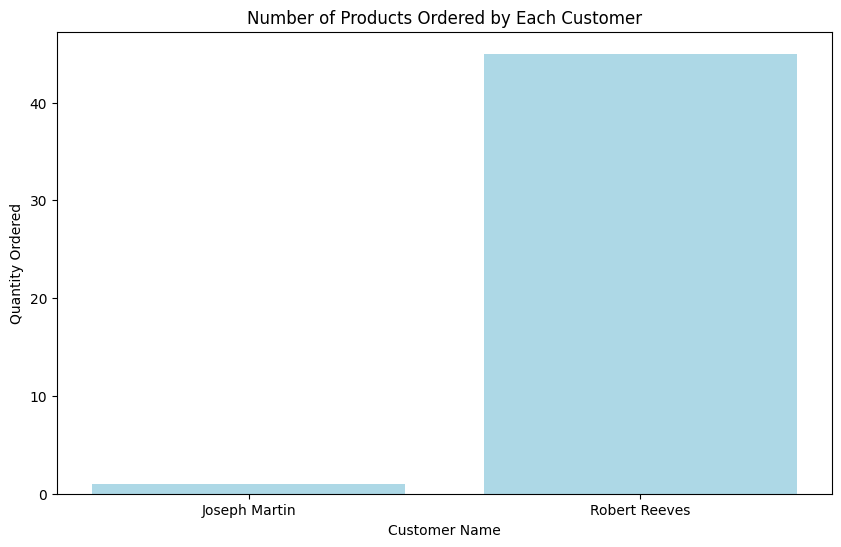

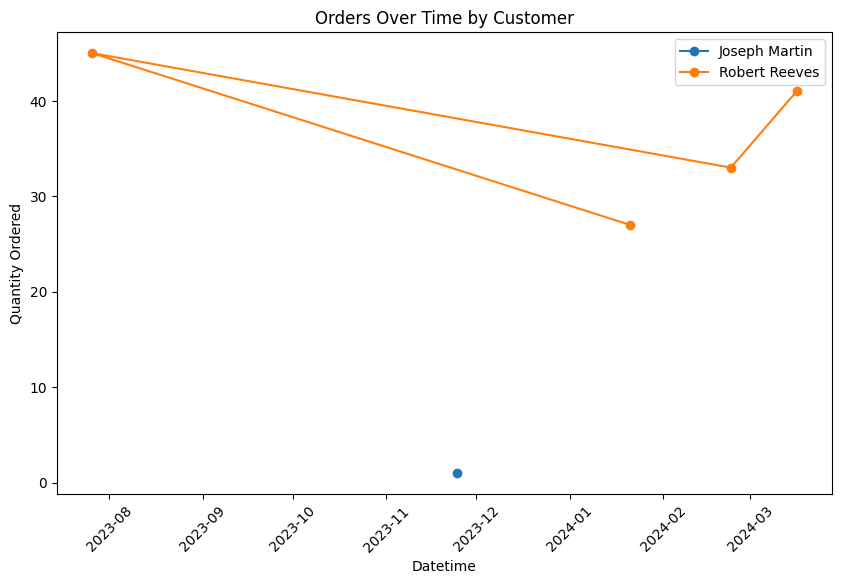

In [40]:
curr.execute("""
    SELECT 
        c.customer_id, 
        c.customer_name, 
        c.country, 
        c.city, 
        o.order_id, 
        o.product_id, 
        o.qty, 
        o.datetime, 
        o.ecommerce_website_name
    FROM 
        Customer c
    JOIN 
        Orders o
    ON 
        c.customer_id = o.customer_id
    ORDER BY 
        c.customer_id, o.order_id
    LIMIT 5;
""")
customer_orders = curr.fetchall()

# Convert the result into a DataFrame
columns = ['customer_id', 'customer_name', 'country', 'city', 'order_id', 'product_id', 'qty', 'datetime', 'ecommerce_website_name']
df = pd.DataFrame(customer_orders, columns=columns)

# Close the cursor and connection
curr.close()
conn.close()

# Example Visualization 1: Number of Products Ordered by Each Customer
plt.figure(figsize=(10, 6))
plt.bar(df['customer_name'], df['qty'], color='lightblue')
plt.xlabel('Customer Name')
plt.ylabel('Quantity Ordered')
plt.title('Number of Products Ordered by Each Customer')
plt.show()

# Example Visualization 2: Orders by Datetime for Each Customer
df['datetime'] = pd.to_datetime(df['datetime'])

plt.figure(figsize=(10, 6))
for customer_name, group in df.groupby('customer_name'):
    plt.plot(group['datetime'], group['qty'], marker='o', label=customer_name)

plt.xlabel('Datetime')
plt.ylabel('Quantity Ordered')
plt.title('Orders Over Time by Customer')
plt.legend()
plt.xticks(rotation=45)
plt.show()